### The maximum $k$-balanced subgraph problem

Let $G = (V,E,s)$ be a signed graph and $k$ a positive scalar satisfying $k \in \{1, \ldots, n\}$.

An edge $e \in E$ is called negative if $s(e) = −1$ and positive if $s(e) = +1$. 

Let $E^{-}$ and $E^{+}$ denote, respectively, the sets of negative and positive edges in a signed graph. 

For a vertex set $S \subseteq V$ , let $E[S] = \{ (i,j) \in E \ | \ i,j \in S \}$ denote the subset of edges induced by $S$.

A signed graph $G$ is balanced if its vertex set can be partitioned into sets $W$ (possibly empty) and $V \setminus W$ in such a way that $E[W] \cup E[V \setminus W] = E^{+}$.

A signed graph $G$ is $k$-balanced if its vertex set $V$ can be partitioned into sets $N_1, N_2, \ldots, N_l$, with $l \leq k$, in such a way that $\cup_{1 \leq i \leq l} E [N_i] = E^{+}$. 
Such a partition is called a $l$-partition.

**k-MBS Problem**

Let $G = (V,E,s)$ be a signed graph and $k \in \{ 1, \ldots, n\}$. 

The maximum $k$-balanced subgraph problem is the problem of finding an induced subgraph $H = (V',E[V'],s)$ of $G$ such that $H$ is
$k$-balanced and maximizes the cardinality of the vertex set $V'$.


We define $G^{-}=(V,E^{-})$ and $G^{+}=(V,E^{+})$.

For a vertex set $S \subseteq V$, we define 
- $N^{−}(S) = \{j \in V \ | \ (i,j) \in E^{-} , i \in S \} \text{ and } N^{−}(\{i\}) = \{j \in V \ | \ (i,j) \in E^{-}  \}$ 
- $N^{+}(S) = \{j \in V \ | \ (i,j) \in E^{+} , i \in S \} \text{ and } (N^{−}(\{i\}) = \{j \in V \ | \ (i,j) \in E^{-}  \}$ 
- $\overline{N}^{-}(S) = V \setminus (N^{-}(S) \cup S) \text{ and } \overline{N}^{-}(\{i\}) = V \setminus (N^{-}(\{i\}) \cup \{i\})$. 

A set $K \subseteq V$ is called a negative(positive) clique if each pair of vertices in $K$ is joined by a negative(positive) edge. 

A positive(negative) hole is a hole with only positive (negative) edges.

We define the arc sets 
$$A = \{(i,j) \ | \ i \in V, \ j \in \overline{N}^{-} (\{ i \}), \ i < j \} \text{ and } A^{0} = A \cup \{(i, i) \ | \ i \in V \}$$ 

An arc $(i,j) \in A^{0}$ indicates that vertex $i$ can represent vertex $j$. 

Let 
$$D(i) = \{j \in V \ | \ (i,j) \in A^{0} \}$$ 
denote the set of all vertices that can be represented by $i$ and let 
$$O(j) = \{i \in V \ | \ (i,j) \in A^{0} \}$$
denote the set of all vertices that can represent $j$. 

Additionally, let $S_{i}$ denote a vertex set such that: 
$$S_{i} \subseteq D(i) \text{ and } i \in S_{i}$$ 
We say that $i$ is the representative vertex of $S_{i}$.

A feasible solution in our formulation defines a $k$-balanced subgraph of G.

Let $n=|V|$ and $m=|A|$. 

To describe this feasible set, we use binary decision variables $x \in \{0, 1\}^{n+m}$ that define a $l$-partition, $l \leq k$, of a $k$-balanced subgraph. 

For each vertex $i \in V$, $x_{i}^{i} = 1$ if $i$ is a representative vertex $i$, 0 otherwise.

For each arc $(i,j) \in A$, $x_{i}^{j} = 1$ if vertex $j$ is represented by vertex $i$ ($j$ belongs to a set $S_{i}$ in $l$-partition), 0 otherwise.

**Formulation IP($G$,$k$)**

$$
\begin{align}
\max \ & \sum_{(i,j) \in A^{0}} x_{j}^{i} \tag{1} \\ 
& \sum_{i \in O(j)} x_{i}^{j} \leq 1, \ \forall j \in V \tag{2} \\
& \sum_{i \in V} x_{i}^{i} \leq k, \tag{3}\\
& x_{i}^{j} \leq x_{i}^{i}, \ \forall (i,j) \in A, \tag{4} \\
& x_{i}^{p} + x_{j}^{p} \leq x_{p}^{p}, \ \forall (i,j) \in E^{-}, \ \forall p \in O(i) \cup O(j), \tag{5} \\
& x_{i}^{p} + x_{j}^{q} \leq 1, \ \forall (i,j) \in E^{+}, \ \forall p \in O(i), \ \forall q \in O(i) \cup O(j) \setminus \{p\}, \tag{6} \\
& x_{i}^{i} \in \{ 0,1 \}, \ \forall i \in V, \tag{7} \\
& x_{i}^{j} \in \{ 0,1 \}, \ \forall (i,j) \in A \tag{8}.
\end{align}
$$

- Constraints (2): the vertex $j$ must be represented by at most one vertex, i.e., vertex $j$ must belong to at most
one cluster in the l-partition. 
- Constraint (3): the total number of representative vertices is limited to $k$, i.e., the total number of clusters in the $l$-partition is limited to $k$. 
- Constraints (4): the vertex $j$ cannot be represented by vertex $i$ unless $i$ is a representative vertex. 
- Constraints (5): consider a negative edge $(i,j) \in E^{-}$, the vertices $i$ and $j$ cannot be represented by a same vertex, i.e., $i$ and $j$ cannot belong to a same cluster in the $l$-partition. 
- Constraints (6): consider a positive edge $(i,j) \in E^{+}$, the vertices $i$ and $j$ are represented by the same vertex whenever both $i$ and $j$ belong to the feasible solution, i.e., in that case vertices $i$ and $j$ belong to the same cluster in the $l$-partition.
- Constraints (7) and (8) impose binary restrictions to the variables. 
- The objective function (1) looks for a maximum subgraph. 

**Lemma**:(Strengthened Positive-Edge Inequality). 

Consider a positive edge $(i,j) \in E^{+}$ . 

Let $S \subseteq O(i)$ be a subset of candidates to represent vertex $i$.

The inequality
$$
\begin{equation}
\sum_{p \in S} x_{i}^{p} + \sum_{p \in O(j)\setminus S} x_{j}^{p} \leq 1, \ \forall (i,j) \in E^{+} \tag{9}
\end{equation}
$$
is valid for $P_{G,k}$ and dominates the constraints (6).


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp

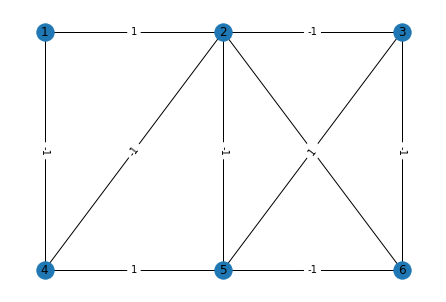

In [2]:
G = nx.Graph()
#G.add_nodes_from([1,2,3,4,5,6])

edges = [(1,2,+1), (1,4,-1), (2,3,-1), (2,4,-1), (2,5,-1), (2,6,+1), (3,5,+1), (3,6,-1), (4,5,+1), (5,6,-1)]

G.add_weighted_edges_from(edges)

#nx.draw_planar(G, with_labels = "True")

pos = {1:(0,0), 2:(2,0), 3:(4,0), 4:(0,-1), 5:(2,-1), 6:(4,-1)}

nx.draw(G, pos, with_labels="True")

edge_labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [3]:
# An arc $(i,j) \in A$ indicates that vertex $i$ can represent vertex $j$, $i\not=j$
def setA(G):
    nodes = G.nodes()

    A = []
    for i in nodes:
        #print(i, ": ", end="")
        neighbors = G.neighbors(i)
        lst = []
        for j in neighbors:
            if G[i][j]["weight"] < 0:
                lst.append(j)
        lst.append(i)
        lstCoV =  list(set(nodes) - set(lst))
        for j in lstCoV:
            if (i<j):
                a = (i,j)
                A.append(a)

    return A

In [4]:
# An arc $(i,j) \in A^{0}$ indicates that vertex $i$ can represent vertex $j$
def setA0(G, A):
    nodes = G.nodes()
    A0 = A
    for i in nodes:
        a = (i,i)
        A0.append(a)

    return A0

In [5]:
# D(i):  set of all vertices that can be represented by $i$ 
def setD(G, A0):
    nodes = G.nodes()
    D = []
    for i in nodes:
        lst = []
        for j in nodes:
            if (i,j) in A0:
                lst.append(j)
        D.append(lst)

    return D

In [6]:
# D(i):  set of all vertices that can be represented by $i$ 
def dicD(G, A0):
    nodes = G.nodes()
    D = {}
    for i in nodes:
        lst = []
        for j in nodes:
            if (i,j) in A0:
                lst.append(j)
        D[i] = lst

    return D

In [7]:
#$O(j)$: set of all vertices that can represent $j$
def setO(G, A0):
    nodes = G.nodes()
    O = []
    for j in nodes:
        lst = []
        for i in nodes:
            if (i,j) in A0:
                lst.append(i)
        O.append(lst)
    
    return O

In [8]:
#$O(j)$: set of all vertices that can represent $j$
def dicO(G, A0):
    nodes = G.nodes()
    O = {}
    for j in nodes:
        lst = []
        for i in nodes:
            if (i,j) in A0:
                lst.append(i)
        O[j] = lst
    
    return O

In [9]:
def edgesEN(G):
    EP = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    EN = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

    return EP, EN

In [10]:
A = setA(G)
A0 = setA0(G,A)
D = dicD(G, A0)
O = dicO(G, A0)
EP, EN = edgesEN(G)

In [11]:
print("A = ", A)
print("A0 = ", A0)
print("D = ", D)
print("O = ", O)
print("EN = ", EN)
print("EP = ", EP)

A =  [(1, 2), (1, 3), (1, 5), (1, 6), (2, 6), (4, 5), (4, 6), (3, 4), (3, 5), (1, 1), (2, 2), (4, 4), (3, 3), (5, 5), (6, 6)]
A0 =  [(1, 2), (1, 3), (1, 5), (1, 6), (2, 6), (4, 5), (4, 6), (3, 4), (3, 5), (1, 1), (2, 2), (4, 4), (3, 3), (5, 5), (6, 6)]
D =  {1: [1, 2, 3, 5, 6], 2: [2, 6], 4: [4, 5, 6], 3: [4, 3, 5], 5: [5], 6: [6]}
O =  {1: [1], 2: [1, 2], 4: [4, 3], 3: [1, 3], 5: [1, 4, 3, 5], 6: [1, 2, 4, 6]}
EN =  [(1, 4), (2, 3), (2, 4), (2, 5), (3, 6), (5, 6)]
EP =  [(1, 2), (2, 6), (4, 5), (3, 5)]


In [12]:
# clear graph
G.clear()

In [13]:
def read_instance(instance):
    with open(instance, 'r') as file: 
        lines = file.readlines()

    lines = [a.strip() for a in lines]

    values = lines[0].split()
    n, m = int(values[0]), int(values[1])

    #print("n =", n)
    #print("m =", m)

    G = nx.Graph()

    for k in range(n):
        G.add_node(k)

    for e in range(1,m+1):
        values = lines[e].split()
        i, j, val = int(values[0]), int(values[1]), int(values[2])
        G.add_edge(i, j, weight=val)

    return G


In [14]:
def plotGraph(G,pos):
    plt.figure(figsize=(20, 12))
    nx.draw_networkx(G,pos,with_labels=True)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

    plt.show()

In [15]:
def position(G):
    #seed = 20532
    pos = nx.spring_layout(G)
    #pos=nx.random_layout(G)
    #pos=nx.circular_layout(G)
    #pos=nx.spectral_layout(G)
    #pos=nx.spiral_layout(G)
    #pos = nx.spring_layout(G, seed=seed)

    return pos

In [52]:
def mip_formulation(G, k, A, A0, O, EP, EN):

    nodes = G.nodes()

    method = "mip"

    #modelnx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    model = gp.Model()

    # silent/verbose mode
    model.Params.OutputFlag = 0

    # variables
    if method == "mip":
        x = model.addVars(A0,vtype=gp.GRB.BINARY, name="x")
    else:
        x = model.addVars(A0,lb=0.0,ub=1.0,vtype=gp.GRB.CONTINUOUS,name="x")

    model.update()

    #objective function
    obj = 0
    for e in A0:
        obj += 1*x[e]
         
    model.setObjective(obj, gp.GRB.MAXIMIZE)

    # constraints
 
    for j in nodes:
        constr = 0
        for i in O[j]:
            constr += x[(i,j)] 
        model.addConstr(constr <= 1.0, "constr2")

    constr = 0
    for i in nodes:
        constr += x[(i,i)] 
    model.addConstr(constr <= k, "constr3")

    for e in A:
        model.addConstr(x[(e[0],e[1])] <= x[(e[0],e[0])], "constr4")

    for e in EN:
        for p in O[e[0]]:
            if p in O[e[1]]:
                model.addConstr(x[(p,e[0])] + x[(p,e[1])] <= x[(p,p)], "constr5")

    #constr6
    #for e in EP:
    #    for p in O[e[0]]:
    #        Cp = list(set(O[e[1]]) - {p})
    #        for q in Cp:
    #            model.addConstr(x[(p,e[0])] + x[(q,e[1])] <= 1.0,"constr6")

    # constr6 sum O(i)
    #for e in EP:
    #    for p in O[e[0]]:
    #        Cp = list(set(O[e[1]]) - {p})
    #        constr1 = 0
    #        for q in Cp:
    #            constr1 += x[(q,e[1])]
    #        model.addConstr(x[(p,e[0])] + constr1 <= 1.0,"constr6_surO(i)")

    # ineq 9 of lemma 3.5 # doesn't work!
    for e in EP:
        S = O[e[0]]
        M = list(set(O[e[1]]) - set(S))
        constr0 = 0
        for p in S:
            constr0 += x[(p,e[0])]
        constr1 = 0
        for p in M:
            constr1 += x[(p,e[1])]
            model.addConstr(constr0 + constr1 <= 1.0, "constr9")

    if method != "mip":
        for v in model.getVars():
            v.setAttr('vtype', 'C')

    model.optimize()
         
    tmp = 0
    if model.status == gp.GRB.OPTIMAL:
        tmp = 1
 
    objval = model.objVal
    runtime = model.Runtime
    status = tmp
    if method == "mip":
        objbound = model.objBound
        mipgap = model.MIPGap
        nodecount = model.NodeCount

    xval = {}
    for e in A0:
        xval[e] = x[e].x

    model.dispose()

    Es = []
    for key, value in xval.items() :
        #print (key, value)
        if value > 0.5:# and key[0] != key[1]:
            Es.append(key)
    
    return objval, objbound, mipgap, nodecount, runtime, status, Es

In [53]:
#random_n20_k2_pos30_neg5_err5_1
#random_n20_k2_pos30_neg5_err5_2
#random_n20_k2_pos30_neg5_err5_3
#random_n20_k2_pos30_neg5_err5_4
#random_n20_k2_pos30_neg5_err5_5

#random_n60_k2_pos30_neg5_err5_1
#random_n60_k2_pos30_neg5_err5_2
#random_n60_k2_pos30_neg5_err5_3
#random_n60_k2_pos30_neg5_err5_4
#random_n60_k2_pos30_neg5_err5_5

# random_n60_k3_pos30_neg5_err5_1

# random_n60_k4_pos30_neg5_err5_1

# random_n60_k5_pos30_neg5_err5_1

instance = f"../data/kmbs/instances/RANDOM/random_n60_k3_pos30_neg5_err5_1.g"
k = 3

G = read_instance(instance)

n = G.number_of_nodes()
m = G.number_of_edges()

print("n =", n)
print("m =", m)

n = 60
m = 311


In [54]:
pos = position(G)

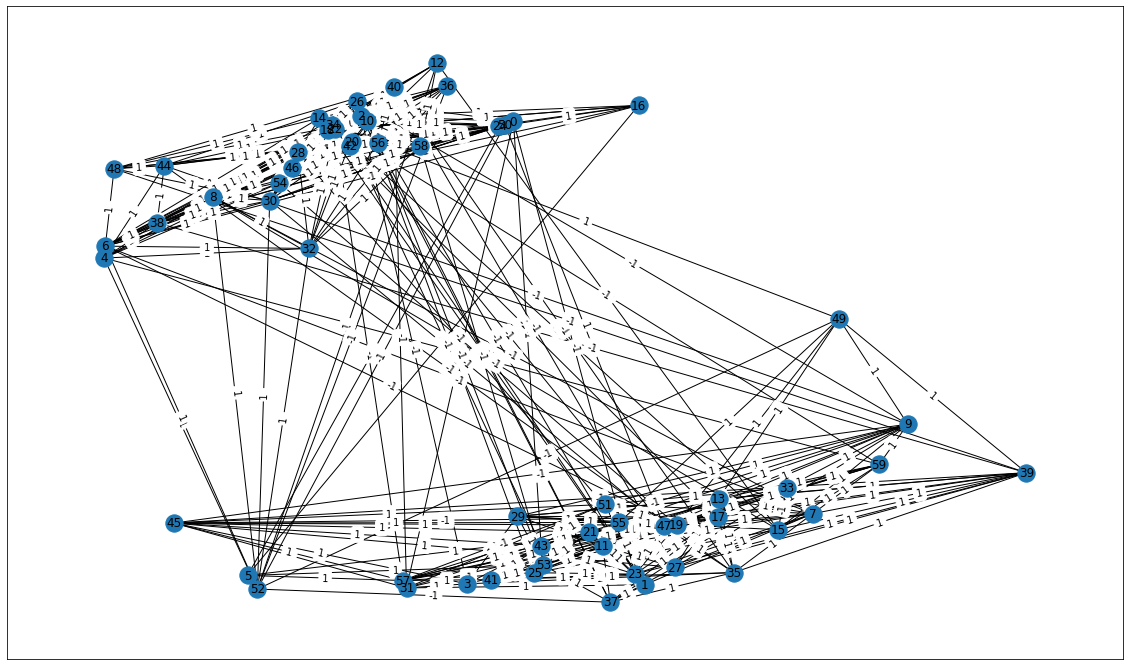

In [55]:
plotGraph(G,pos)

In [56]:
A = setA(G)
#print(A)

A0 = setA0(G, A)
#print(A0)

#D = setD(G, A0)
D = dicD(G, A0)
#print(D)

#O = setO(G, A0)
O = dicO(G, A0)
#print(O)

EP, EN = edgesEN(G)
#print(len(EP),len(EN))

HP = nx.Graph()
HN = nx.Graph()

HP.add_edges_from(EP)
HN.add_edges_from(EN)

#H = G.edge_subgraph(EP)
#print(H.number_of_nodes())
#print(H.number_of_edges())

#print(H.nodes())
#print(H.edges())

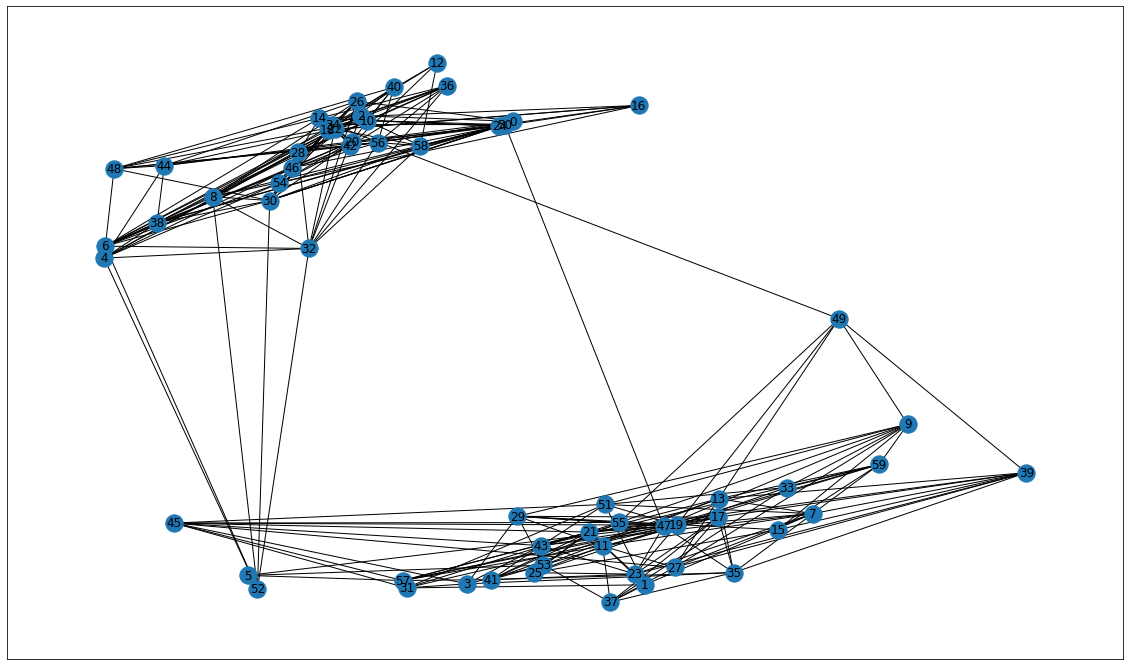

In [57]:
plotGraph(HP,pos)

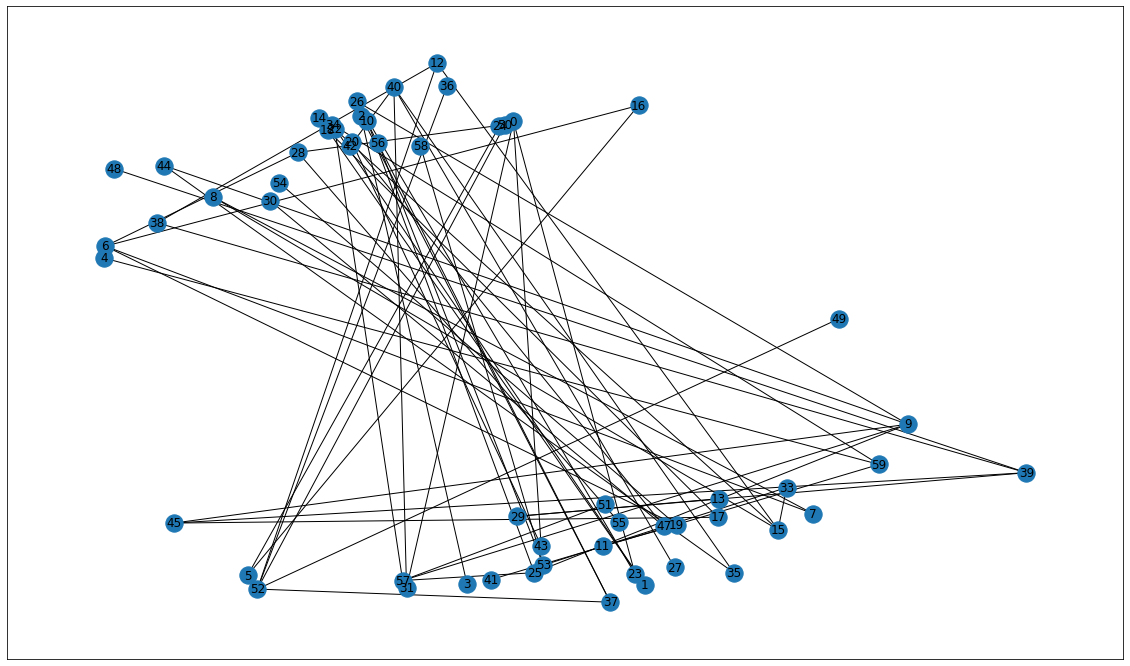

In [58]:
plotGraph(HN,pos)

In [59]:
objval, objbound, mipgap, nodecount, runtime, status, Es = mip_formulation(G, k, A, A0, O, EP, EN)
    
print("ub = ", objval)
print("time = ", runtime)
print("status = ", status)
print("lb = ", objbound)
print("gap = ", mipgap)
print("nodes = ", nodecount)


ub =  56.0
time =  0.40634822845458984
status =  1
lb =  56.0
gap =  0.0
nodes =  1.0


In [24]:
print(Es)

[(0, 3), (0, 6), (0, 9), (0, 12), (0, 15), (0, 18), (0, 21), (0, 24), (0, 27), (0, 33), (0, 39), (0, 42), (0, 45), (0, 51), (0, 54), (0, 57), (1, 4), (1, 7), (1, 10), (1, 13), (1, 16), (1, 19), (1, 22), (1, 25), (1, 28), (1, 31), (1, 32), (1, 40), (1, 43), (1, 46), (1, 49), (1, 52), (1, 55), (1, 58), (2, 5), (2, 8), (2, 11), (2, 14), (2, 17), (2, 20), (2, 23), (2, 29), (2, 35), (2, 38), (2, 44), (2, 47), (2, 50), (2, 56), (2, 59), (0, 0), (1, 1), (2, 2)]


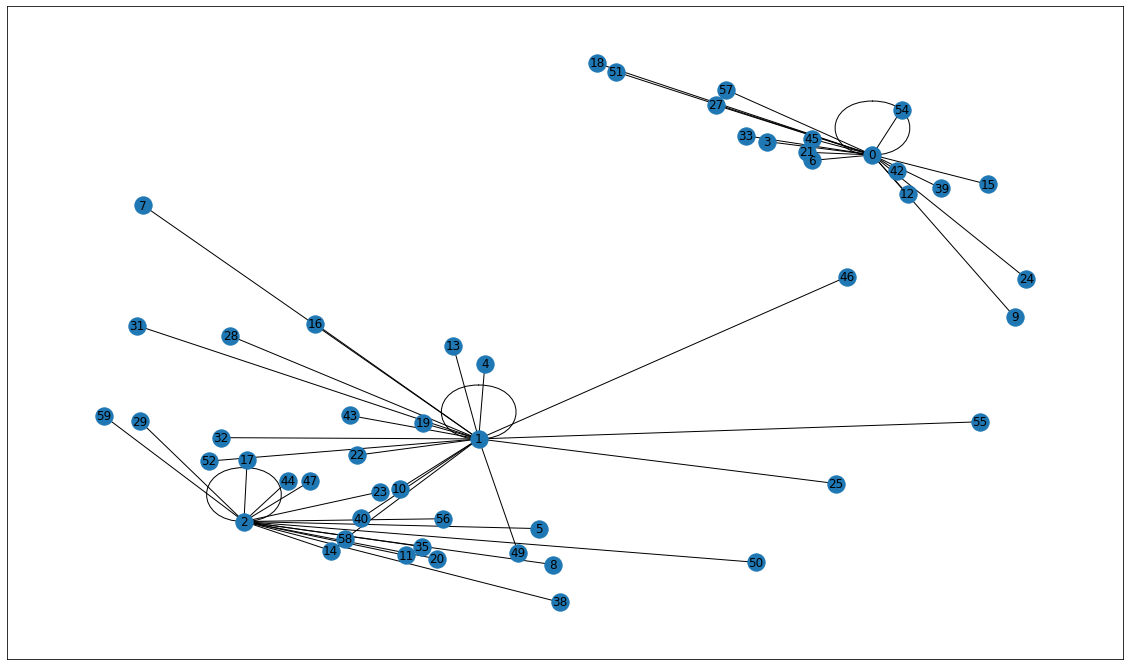

In [25]:
Gs = nx.Graph()
Gs.add_edges_from(Es)
plotGraph(Gs,pos)

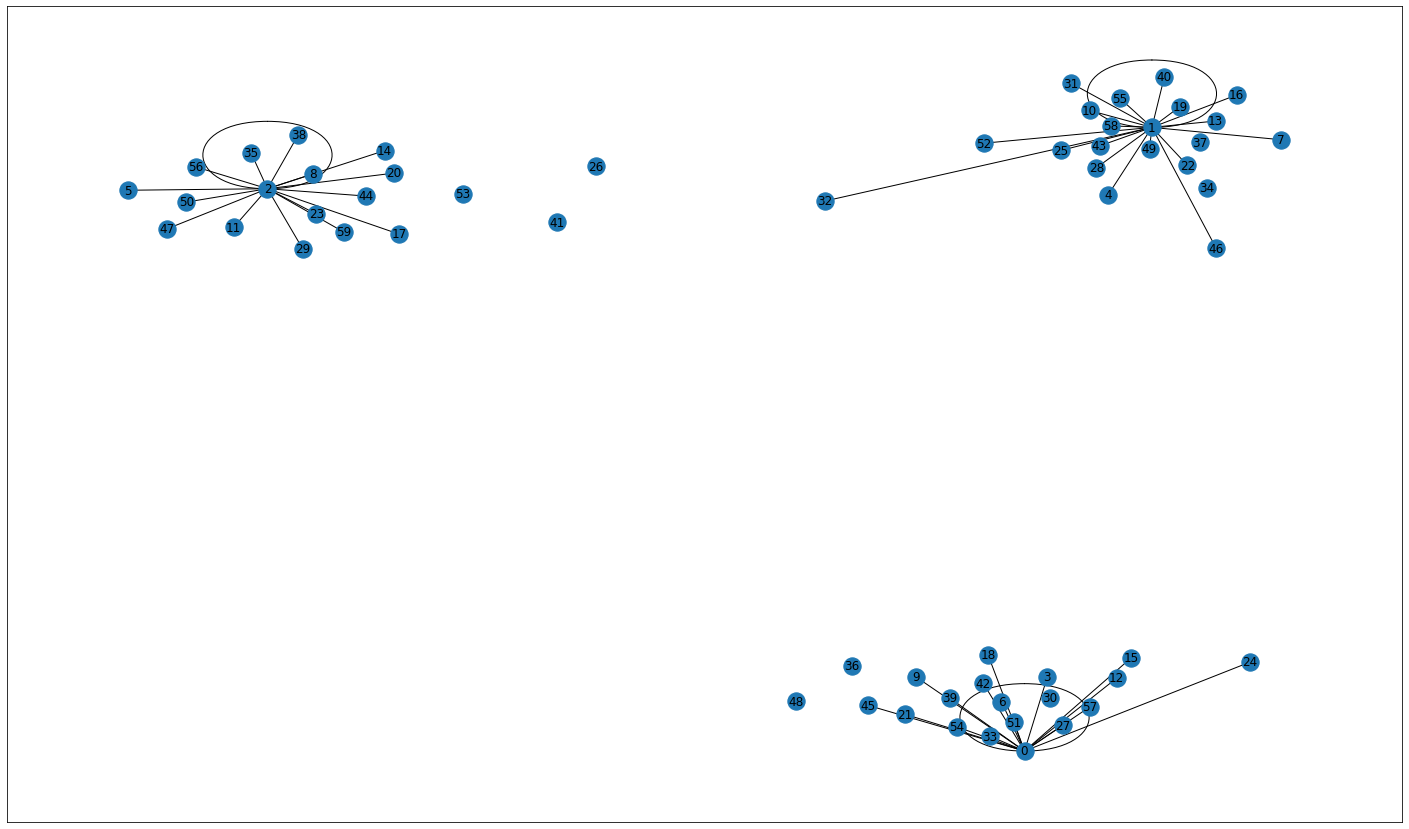

In [26]:
Gs = nx.Graph()
Gs.add_nodes_from(G)
plt.figure(figsize=(25, 15))        
seed = 20532
pos1 = nx.spring_layout(HP, seed=seed)
Gs.add_edges_from(Es)
nx.draw_networkx(Gs, pos1, node_size=300, with_labels=True)
plt.show()

In [27]:
print(sorted(Gs.nodes()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


()
(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)


In [65]:
lstNodes = []
for n in G.nodes():
    lstNodes.append(n)

In [66]:
lstNodes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [67]:
import itertools

stuff = [1, 2, 3]
for L in range(len(stuff) + 1):
    for subset in itertools.combinations(stuff, L):
        print(subset)

()
(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)
